# CAT paper figure 2

This code summarises the literature input data for the CAT equity work and is used to produce figure 2 of the paper.

Author: Louise Jeffery

In [1]:
import sys
sys.path.append("..")
sys.path.append("../data")

# general modules
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from datetime import date


# CAT equity code
from utils import * 
from analysis_pipeline import *
from catequitylevels import * # Scripts to generate all necessary records
from legacy import * 

# Use paper style
plt.style.use(os.path.join('..','climatic_change.mplstyle'))

### Data read-in

In [3]:
# Read in CAT data and run through processing. 

# First, data used in final runs (reference case for intl law paper)
that_config = utils.read_config("config_intl_law_reference_case.yaml")
set2_label = 'Full literature'

records_df_2 = process_ca_nci_data(that_config)
df_lower_2, df_upper_2 = calculate_effort_sharing_range(records_df_2, that_config)

# Historical data
hist_data = load_historical_data('data/Historic_data_per_country.csv')

# Also read in uncurated data (using Sep '20 Master version written to csv)
that_config['nci_data'] = 'data/EffortSharing_ALLdataInput_Master_UpdateSep2020_uncurated_data_for_paper.csv'
records_uncurated = process_ca_nci_data(that_config)
uncurated_lower, uncurated_upper = calculate_effort_sharing_range(records_uncurated, that_config)


C:\Users\Louise\source\Anaconda3\envs\pdtools\lib\site-packages\ipykernel_launcher.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys
unknown categories were encountered: {'BAU', 'Historic'}
Aggregating using min_max: 100%|██████████| 207/207 [00:06<00:00, 31.26it/s]
C:\Users\Louise\source\Anaconda3\envs\pdtools\lib\site-packages\ipykernel_launcher.py:15: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
unknown categories were encountered: {'BAU', 'Historic'}
Aggregating using min_max: 100%|██████████| 208/208 [00:08<00:00, 25.25it/s]


### Clean the data

In [64]:
# First for the main results
results = records_df_2.copy()

# remove regions from results data
valid_countries = hist_data.index
results = results.loc[results['Country_ID'].isin(valid_countries )]

# only use data for 2030
results = results.loc[results['Year'] == 2030]

# labelling
# merge those with the same meaning!
results['Gas_ID'].loc[results['Gas_ID'] == 'All_gases'] = 'All_Gases'
results['Sectors_ID'].loc[results['Sectors_ID'] == 'All_sectors'] = 'All'

# reformat for plots
results['Category'].loc[results['Category'] == 'Capability_costs'] = 'Capability-Costs'
results['Category'].loc[results['Category'] == 'Eq._cumulative_per_capita_emissions'] = 'Equal \n cumulative per cap.\n  emissions'
results['Category'].loc[results['Category'] == 'Resp_cap_need'] = 'Responsibility-\nCapability-Need'       

# only assess the Literature data - ignore any CA data here! 
results_full = results.copy()
results = results.loc[results['Source'] == 'NCI']

results

Base_year_of_study                          Category  Category_nr  \
72                   2010                            Staged            7   
73                   2010                            Staged            7   
74                   2010                            Staged            7   
75                   2010                            Staged            7   
88                   2010                            Staged            7   
89                   2010                            Staged            7   
90                   2010                            Staged            7   
91                   2010                            Staged            7   
184                  2010                            Staged            7   
185                  2010                            Staged            7   
186                  2010                            Staged            7   
187                  2010                            Staged            7   
260                  2010                            Staged            7   
261                  2010                            Staged            7   
262                  2010                            Staged            7   
263                  2010                            Staged            7   
344                  2010                            Staged            7   
345                  2010                            Staged            7   
346                  2010                            Staged            7   
347                  2010                            Staged            7   
472                  2010                            Staged            7   
473                  2010                            Staged            7   
474                  2010                            Staged            7   
475                  2010                            Staged            7   
520                  2010                            Staged            7   
521                  2010                            Staged            7   
522                  2010                            Staged            7   
523                  2010                            Staged            7   
552                  2010                            Staged            7   
553                  2010                            Staged            7   
...                   ...                               ...          ...   
30446                2015                          Equality            3   
30450                2015                          Equality            3   
30453                2015                          Equality            3   
30457                2015                          Equality            3   
30461                2015                          Equality            3   
30465                2015                          Equality            3   
30469                2015                          Equality            3   
30473                2015                          Equality            3   
30477                2015                          Equality            3   
30481                2015                          Equality            3   
30485                2015                          Equality            3   
30488                2015                          Equality            3   
30492                2015                            Staged            7   
30496                2015                            Staged            7   
30500                2015                            Staged            7   
30504                2015                            Staged            7   
30508                2015                            Staged            7   
30512                2015                            Staged            7   
30516                2015                            Staged            7   
30520                2015                            Staged            7   
30523                2015                            St

In [65]:
# Then for the uncurated data
results_uncurated = records_uncurated.copy()

# remove regions from results data
valid_countries = hist_data.index
results_uncurated = results_uncurated.loc[results_uncurated['Country_ID'].isin(valid_countries )]

# only use data for 2030
results_uncurated = results_uncurated.loc[results_uncurated['Year'] == 2030]

# labelling
# merge those with the same meaning!
results_uncurated['Gas_ID'].loc[results_uncurated['Gas_ID'] == 'All_gases'] = 'All_Gases'
results_uncurated['Sectors_ID'].loc[results_uncurated['Sectors_ID'] == 'All_sectors'] = 'All'

# reformat for plots
results_uncurated['Category'].loc[results_uncurated['Category'] == 'Capability_costs'] = 'Capability-Costs'
results_uncurated['Category'].loc[results_uncurated['Category'] == 'Eq._cumulative_per_capita_emissions'] = 'Equal \n cumulative per cap.\n  emissions'
results_uncurated['Category'].loc[results_uncurated['Category'] == 'Resp_cap_need'] = 'Responsibility-\nCapability-Need'       

# only assess the Literature data - ignore any CA data here! 
results_uncurated_full = results_uncurated.copy()
results_uncurated = results_uncurated.loc[results_uncurated['Source'] == 'NCI']

#results_uncurated

### Summarise the data

In [4]:
#results.columns

print('Total number of data points is: ' + str(len(results)))
print('Total number of countries is: ' + str(len(results['Country_ID'].unique())))
print('Total number of regimes is: ' + str(len(results['Regime_ID'].unique())))
print('Total number of studies is: ' + str(len(results['Study_ID'].unique())))

print('Unique category names are: ')
results['Category'].unique()
    
# results['Country_ID'].unique()

Total number of data points is: 7001
Total number of countries is: 180
Total number of regimes is: 42
Total number of studies is: 29
Unique category names are: 


array(['Staged', 'Equality', 'Capability-Costs', 'Capability',
       'Equal cumulative \n per cap. emissions',
       'Responsibility-\nCapability-Need', 'Responsibility'], dtype=object)

### Generate the figures

Use groupby to make histograms of the number of studies in various different categories. 

In [71]:
# Set up the plots 

sns.set(font_scale = 1.1)
sns.color_palette()

sns.set_style("whitegrid")
#sns.set_style("darkgrid")

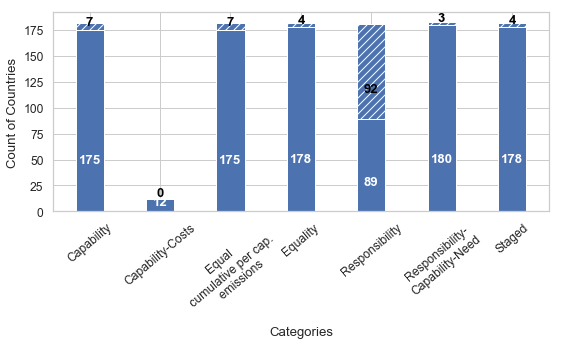

In [87]:
#  Number of countries with data in each category 

plt.figure(figsize=(8,5))

# Prepare the data - extract and groupby
# Used data
test4 = results[['Country_ID', 'Category']]
test4_gb = test4.groupby(['Category']).agg(['nunique'])         
test4_gb.columns = test4_gb.columns.droplevel()

# raw data
rawlit = results_uncurated[['Country_ID', 'Category']]
rawlit_gb = rawlit.groupby(['Category']).agg(['nunique'])         
rawlit_gb.columns = rawlit_gb.columns.droplevel()

# Precalculate...
yvals_0 = test4_gb['nunique']
yvals_1 = rawlit_gb['nunique'] - test4_gb['nunique']
yvals_2 = rawlit_gb['nunique']
inds = test4_gb.index
width = 0.4  

# Make the bar plot 
ax0 = plt.bar(inds, yvals_0, width, bottom=0,  color='C0')
ax1 = plt.bar(inds, yvals_1, width, bottom=yvals_0, color='C0', edgecolor='white', hatch='///')

# reorient x-labels
plt.xticks(rotation=40,
    horizontalalignment='center',
    verticalalignment='top',
    fontweight='light'
    )
plt.xlabel('Categories')
plt.ylabel('Count of Countries')



# add quantity labels to columns
def autolabel(rects, label_col):
    """Attach a text label beside each bar """
    for rect in rects:
        y_pos = rect.get_xy()[1] + (rect.get_height() / 4)
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, y_pos),
                    xytext=(0, 6),  # 
                    textcoords="offset points",
                    ha='center', va='center', 
                    fontsize='medium',
                    fontweight='bold',
                    color=label_col)

autolabel(ax1, 'black')
autolabel(ax0, 'white')

# tidy up - keep everything clean for export
plt.tight_layout()

# save to file
today = date.today().strftime("%d%m%Y")
outputdir = os.path.join('..', 'louise_output', 'CAT-paper')
if not os.path.exists(outputdir):
        os.makedirs(outputdir)

        
filename = ('Fig2-CAT-equity-countries-per-category' + today + '.png')
fullfilepath = os.path.join(outputdir,filename)
plt.savefig(fullfilepath, dpi=300)


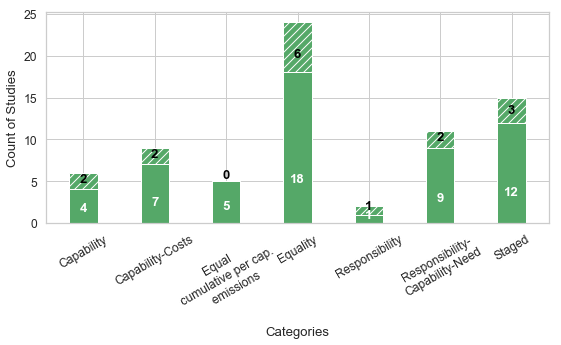

In [88]:
# Part 2 - similar plot but for number of studies..

# Prepare the data - extract and groupby
test5 = results[['Study_ID', 'Category']]
test5_gb = test5.groupby(['Category']).agg(['nunique'])         
test5_gb.columns = test5_gb.columns.droplevel()

# raw data
rawlit2 = results_uncurated[['Study_ID', 'Category']]
rawlit2_gb = rawlit2.groupby(['Category']).agg(['nunique'])         
rawlit2_gb.columns = rawlit2_gb.columns.droplevel()

plt.figure(figsize=(8,5))

# Precalculate...
yvals_2 = test5_gb['nunique']
yvals_3 = rawlit2_gb['nunique'] - test5_gb['nunique']
inds = test4_gb.index
width = 0.4  

# Make the bar plot 
ax2 = plt.bar(inds, yvals_2, width, bottom=0,  color='C2')
ax3 = plt.bar(inds, yvals_3, width, bottom=yvals_2, color='C2', edgecolor='white', hatch='///')

# annotate bars 
autolabel(ax2, 'white')
autolabel(ax3, 'black')

# reorient x axis labels
plt.xticks(rotation=30,
    horizontalalignment='center',
    verticalalignment='top',
    fontweight='light'
    )
plt.xlabel('Categories')
plt.ylabel('Count of Studies')


plt.tight_layout()

filename = ('Fig2-CAT-equity-studies-per-category' + today + '.png')
fullfilepath = os.path.join(outputdir,filename)
plt.savefig(fullfilepath, dpi=300)

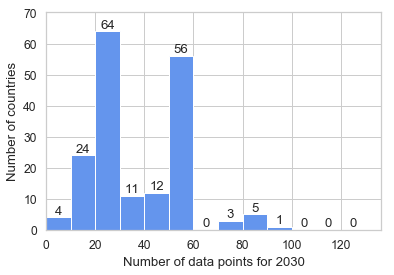

In [80]:
## Number of data points by country - histogram



# Prepare the data - extract and groupby
# 'Regime_ID', 'Study_ID',
test6 = results[['Emissions_allocation_(MtCO2e)', 'Country_ID']]
test6_gb = test6.groupby(['Country_ID']).agg(['nunique'])         
test6_gb.columns = test6_gb.columns.droplevel()
test6_gb

# try some more barplots instead
#yvals=test6_gb['nunique']
#inds = test6_gb.index
freq, bins, patches = plt.hist(test6_gb['nunique'], 
            bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130], 
            facecolor='cornflowerblue', alpha=1)
plt.xlabel("Number of data points for 2030")
plt.ylabel("Number of countries")
mn, mx = plt.xlim()
plt.xlim(0, mx)
plt.ylim(0,70)
#plt.title('')

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]
n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
    n = n+1
    
filename = ('Fig2-datapoints-per-country_Litdata' + today + '.png')
fullfilepath = os.path.join(outputdir,filename)
plt.savefig(fullfilepath, dpi=300)



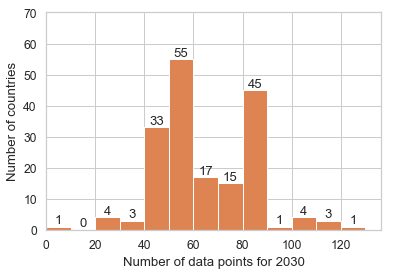

In [81]:
# Similar plot, but also including CA data 

# Prepare the data - extract and groupby
# 'Regime_ID', 'Study_ID',
test7 = results_full[['Emissions_allocation_(MtCO2e)', 'Country_ID']]
test7_gb = test7.groupby(['Country_ID']).agg(['nunique'])         
test7_gb.columns = test7_gb.columns.droplevel()
test7_gb

# try some more barplots instead
#yvals=test6_gb['nunique']
#inds = test6_gb.index
freq, bins, patches = plt.hist(test7_gb['nunique'], 
            bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130], 
            facecolor='C1', alpha=1)

plt.xlabel("Number of data points for 2030")
plt.ylabel("Number of countries")
mn, mx = plt.xlim()
plt.xlim(0, mx)
plt.ylim(0,70)
#plt.title('')

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]
n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
    n = n+1
    
filename = ('Fig2-datapoints-per-country-CA-data' + today + '.png')
fullfilepath = os.path.join(outputdir,filename)
plt.savefig(fullfilepath, dpi=300)


In [86]:
# Combine the Literature and CA study results in one plot


plt.figure(figsize=(8,5))

# try some more barplots instead
freq, bins, patches = plt.hist([test6_gb['nunique'], test7_gb['nunique']],
            bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130], 
            alpha=1)
plt.xlabel("Number of data points for 2030")
plt.ylabel("Number of countries")
mn, mx = plt.xlim()
plt.xlim(0, mx)
plt.ylim(0,70)
plt.title('Data points per country in 2030')

# Labels messy if plotting both side by side
# x coordinate for labels
# bin_centers = np.diff(bins)*0.5 + bins[:-1]
# n = 0
# for fr, x, patch in zip(freq, bin_centers, patches):
#     height = int(freq[n])
#     plt.annotate("{}".format(height),
#                xy = (x, height),             # top left corner of the histogram bar
#                xytext = (0,0.2),             # offsetting label position above its bar
#                textcoords = "offset points", # Offset (in points) from the *xy* value
#                ha = 'center', va = 'bottom'
#                )
#     n = n+1
    
plt.legend(('Literature data only', 'Literature and \nsupplementary data'), 
          facecolor='white', framealpha=1, bbox_to_anchor=(1, 1))
           #loc="best")

plt.tight_layout()
    
filename = ('Fig2-datapoints-per-country' + today + '.png')
fullfilepath = os.path.join(outputdir,filename)
plt.savefig(fullfilepath, dpi=300)



In [69]:
# can we use a violin plot to show the number of data points that each country has in each
# category? Could be split by weith and without the CA data. 

results_full

plt.figure(figsize=(14,5))

testn = results[['Country_ID', 'Category', 'Emissions_allocation_(MtCO2e)']]
testn_gb = testn.groupby(['Category', 'Country_ID']).agg(['nunique'])         
testn_gb.columns = testn_gb.columns.droplevel()
testn_gb = testn_gb.reset_index()
testn_gb['source'] = 'Literature'

testnb = results_full[['Country_ID', 'Category', 'Emissions_allocation_(MtCO2e)']]
testnb_gb = testnb.groupby(['Category', 'Country_ID']).agg(['nunique'])         
testnb_gb.columns = testnb_gb.columns.droplevel()
testnb_gb = testnb_gb.reset_index()
testnb_gb['source'] = 'All'

dataToPlot2 = pd.concat([testn_gb, testnb_gb])

#sns.violinplot(x='Category', y='nunique', data = testn_gb)

fig = sns.swarmplot(x="Category", y='nunique', 
                    data=dataToPlot2,
                    #order=sorted(df_individual['Category'].unique()),
                    hue='source',
                    #jitter=True,
                    #split=True, inner="quart", linewidth=1
                    split=True, linewidth=1
                   )

## Annotate the plot with number of countries shown

# calculate number of countries in each group
ncountries = dataToPlot2.copy()
ncountries = ncountries.drop(['nunique'], axis=1)
ncountries = ncountries.groupby(['Category', 'source']).agg(['nunique'])  

# determine location 
labels = ncountries['nunique']
height = 30
xloc = 
for cat in ncountries:
    plt.annotate('{:.0f}%'.format(cat),
                xy=(xloc(cat), height),
                xytext=(0, 0),  # 
                textcoords="offset points",
                ha='left', va='center', 
                fontsize='xx-small')



# reorient x-labels
fig.set_xticklabels(
    fig.get_xticklabels(), 
    rotation=25, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'
    )

plt.legend(loc='upper left', fontsize='small')
plt.tight_layout()

#testn_gb

C:\Users\Louise\source\Anaconda3\envs\pdtools\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


TypeError: 'AxesSubplot' object is not iterable

In [226]:
# calculate some statistics

print("Median is : ")
print(test6_gb.median())
print("Mean is : ")
print(test6_gb.mean())
print("Max is : " + str(test6_gb.max()))
print("Min is : " + str(test6_gb.min()))

Median is : 
nunique    29.0
dtype: float64
Mean is : 
nunique    38.561111
dtype: float64
Max is : nunique    91
dtype: int64
Min is : nunique    3
dtype: int64


In [233]:
country_check = test6_gb.loc[test6_gb['nunique'] > 60]
country_check

low_country_check = test6_gb.loc[test6_gb['nunique'] < 20]
low_country_check

nunique
Country_ID         
AGO              16
GMB              18
GRD              16
MMR              16
MNE               3
PSE               3
SOM              13
SRB              17

In [68]:
dataToPlot2

annotate = dataToPlot2.copy()
annotate = annotate.drop(['nunique'], axis=1)
annotate = annotate.groupby(['Category', 'source']).agg(['nunique'])  
annotate

Country_ID
                                                     nunique
Category                               source               
Capability                             All               181
                                       Literature        175
Capability-Costs                       All                12
                                       Literature         12
Equal cumulative \n per cap. emissions All               175
                                       Literature        175
Equality                               All               181
                                       Literature        178
Responsibility                         All               181
                                       Literature         89
Responsibility-\nCapability-Need       All               182
                                       Literature        180
Staged                                 All               178
                                       Literature        178